In [47]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [48]:
def dist(p1,p2):
    return np.sqrt(((p1-p2)**2).sum())

print dist(np.array([0,0]),np.array([1,1]))

1.41421356237


(1200, 1920, 3)
(320, 480, 3)


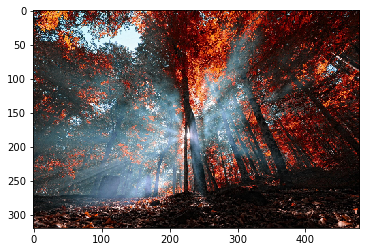

In [49]:
im = cv2.imread('/Users/apple/Desktop/perceptron/wall/wallhaven-254710.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print im.shape
img = cv2.resize(im,(480,320))
print img.shape
plt.imshow(img)
plt.show()

In [50]:
image_vector = img.reshape((img.shape[0]* img.shape[1]),img.shape[2])
print image_vector.shape

(153600, 3)


In [51]:
print image_vector[:5,:]
print image_vector.min(),image_vector.max()

[[ 63  66  92]
 [ 91 132 149]
 [152  58  36]
 [170  58  35]
 [ 89   9  13]]
0 255


In [52]:
k = 3
dim = image_vector.shape[1]
data_std = image_vector
centers = np.random.uniform(low=data_std.min(), high=data_std.max(), size=(k, dim))
print centers.shape
print centers

(3, 3)
[[ 175.46257866   22.82898276    5.19502253]
 [  19.08055552  152.16868193  244.2361906 ]
 [ 243.83944731    8.92357843  201.71367221]]


In [53]:
clusters = {}
shifts = {}

for kx in range(k):
    clusters[kx] = {
        'center': centers[kx, :],
        'points': []
    }
    
    shifts[kx] = []
print clusters

{0: {'points': [], 'center': array([ 175.46257866,   22.82898276,    5.19502253])}, 1: {'points': [], 'center': array([  19.08055552,  152.16868193,  244.2361906 ])}, 2: {'points': [], 'center': array([ 243.83944731,    8.92357843,  201.71367221])}}


In [55]:
for px in range(data_std.shape[0]):
    distance_px = []
    for kx in range(k):
        distance_px.append(dist(data_std[px, :], clusters[kx]['center']))
    distance_px = np.asarray(distance_px)
    c_id = distance_px.argmin()
    
    clusters[c_id]['points'].append(data_std[px, :])

plt.figure(0)
cols = ['red', 'green', 'blue', 'yellow', 'pink']
print clusters



{0: {'points': [array([63, 66, 92], dtype=uint8), array([152,  58,  36], dtype=uint8), array([170,  58,  35], dtype=uint8), array([89,  9, 13], dtype=uint8), array([118,  19,   8], dtype=uint8), array([58,  6,  6], dtype=uint8), array([101,  45,  39], dtype=uint8), array([115,  31,  25], dtype=uint8), array([84, 11,  4], dtype=uint8), array([64, 12, 13], dtype=uint8), array([42,  4,  1], dtype=uint8), array([112,  65,  54], dtype=uint8), array([160,  35,  24], dtype=uint8), array([119,   4,   3], dtype=uint8), array([165,  34,  24], dtype=uint8), array([131,  25,  21], dtype=uint8), array([171,  59,  20], dtype=uint8), array([103,  16,   4], dtype=uint8), array([141,  39,   9], dtype=uint8), array([255, 143,  13], dtype=uint8), array([237, 149,  72], dtype=uint8), array([158,  50,  22], dtype=uint8), array([210,  72,  28], dtype=uint8), array([117,  18,   7], dtype=uint8), array([123,  26,  26], dtype=uint8), array([140,  26,  13], dtype=uint8), array([185,  60,  25], dtype=uint8), arr

In [59]:
for ix in range(k):
    print clusters[ix]['center']
    print len(clusters[ix]['points'])

[ 175.46257866   22.82898276    5.19502253]
117851
[  19.08055552  152.16868193  244.2361906 ]
30547
[ 243.83944731    8.92357843  201.71367221]
5202


In [60]:
new_image=np.zeros(data_std.shape)
print new_image.shape

(153600, 3)


In [ ]:
for ix in range(data_std.shape):
    data_std[ix]